In [7]:
import sys

cfg = open('/Users/artyom/Software/pythia/pythia8307/Makefile.inc')
lib = '../lib'

for line in cfg:

    if line.startswith('PREFIX_LIB='): lib = line[11:-1]; break
    
sys.path.insert(0, lib)

import pythia8

In [8]:
pythia = pythia8.Pythia('printBanner = false')

events = 100
momentum = []

pythia.readString('Beams:idA = 2212')
pythia.readString('Beams:idB = 2212')

pythia.readString('Beams:eCM = 14000')

pythia.readString('SoftQCD:all = on')

hist = pythia8.Hist('Momentum Distribution', 100, -10, 10)

pythia.init()

for event in range(events):

    if not pythia.next(): continue
    
    entries = pythia.event.size()

    print('Event: {}'.format(event))
    print('Event size {}: '.format(entries))

    for j in range(entries):

        id = pythia.event[j].id()
        m = pythia.event[j].m()

        pz = pythia.event[j].pz()

        momentum.append(pz)

        hist.fill(pz)

plot = pythia8.HistPlot('test')

plot.frame('output', 'Momentum Distribution', 'Momentum', 'Entries')
plot.add(hist)

plot.plot()

None


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.307      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Feb 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 09 Oct 2022 at 22:42:34    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

In [9]:
import matplotlib.pyplot as plt

In [10]:
plot = open('output-0.dat')
plot = [line.split() for line in plot]

pz = [float(x[0]) for x in plot]
w = [float(x[1]) for x in plot]
entries = [float(x[2]) for x in plot]

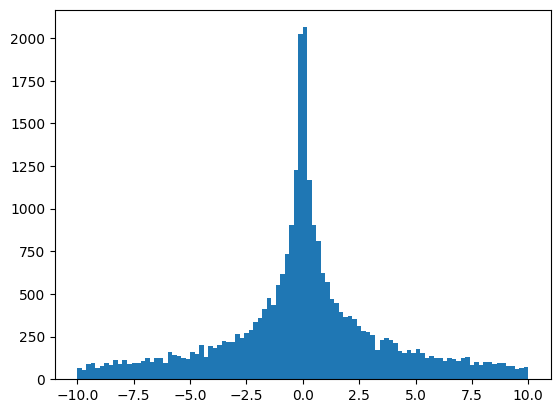

In [11]:
plt.hist(pz, entries, weights=w)
plt.show()

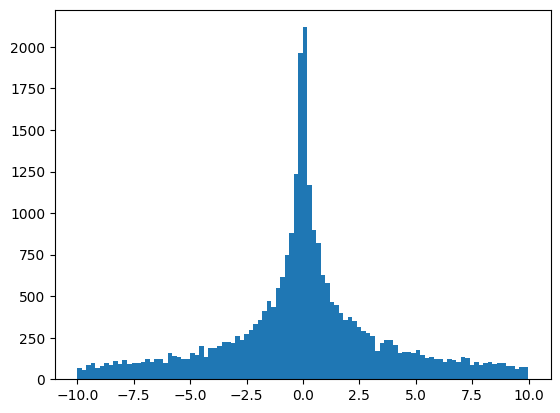

In [12]:
import numpy as np

momentum = np.array(momentum)

plt.hist(momentum[(momentum >= -10) * (momentum <= 10)], 100)
plt.show()